In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
dataset = pd.read_csv('tempo.csv', sep=';')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
dataset.shape

(14, 5)

In [7]:
agrupado = dataset.groupby(dataset['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

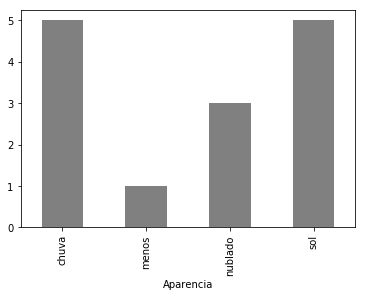

In [8]:
agrupado.plot.bar(color='grey')

In [9]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

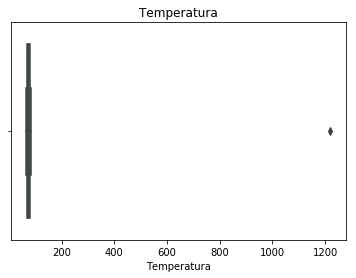

In [10]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

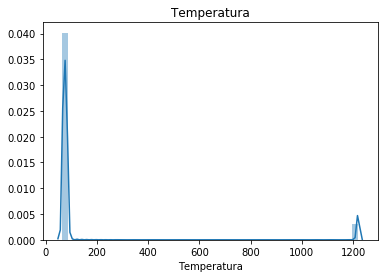

In [11]:
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [12]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

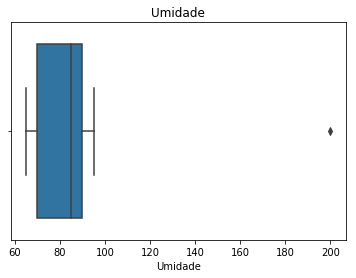

In [13]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

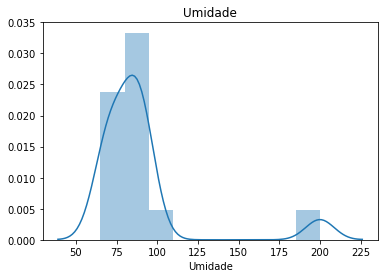

In [23]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [16]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [17]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [19]:
dataset['Umidade'].fillna(mediana, inplace=True)
dataset['Umidade'].isnull().sum()

0

In [21]:
agrupado = dataset.groupby(dataset['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [22]:
dataset['Vento'].fillna('FALSO', inplace=True)
dataset['Vento'].isnull().sum()

0

In [24]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [25]:
#Padronizando aparencia
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
agrupado = dataset.groupby(dataset['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [28]:
#padronizando temperatura
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]


,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [29]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [30]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [31]:
#padronizando umidade
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [32]:
mediana = sts.median(dataset['Umidade'])
mediana

85.25

In [33]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [34]:
#Verificando dados estão ok

#aparencia
agrupado = dataset.groupby(dataset['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

Text(0.5, 1.0, 'Temperatura')

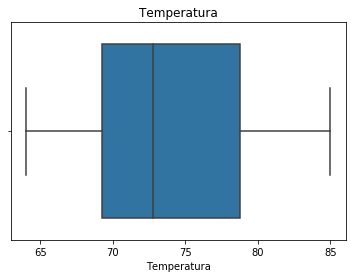

In [35]:
#temperatura
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Umidade')

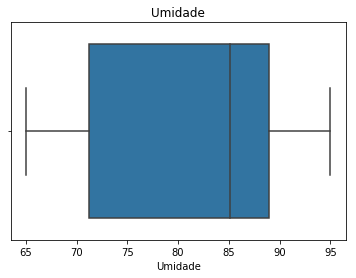

In [36]:
#umidade
srn.boxplot(dataset['Umidade']).set_title('Umidade')

In [37]:
#jogar
agrupado = dataset.groupby(dataset['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [38]:
# vazios
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [41]:
dataset[dataset.duplicated( keep=False)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
